# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import glob
import json
%matplotlib inline

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
#downlaoded from the provided link on the notes
twitterarchive=pd.read_csv('twitter-archive-enhanced.csv')
twitterarchive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#using response and get to retrieve data from url
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open ('image-predictions.tsv',mode='wb')as file:
    file.write(response.content)

In [5]:
#checking response status ,expected output is 200 which means request was successful
response.status_code

200

In [6]:
#using .head() to confirm  contents of tsv file
imagestable=pd.read_csv('image-predictions.tsv',sep='\t')
imagestable.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#converting the txt file to alist where line contains tweet information.
df_list=[]
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [8]:
#printing contents of the second component in the list.
print(df_list[1])

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017', 'id': 892177421306343426, 'id_str': '892177421306343426', 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV", 'truncated': False, 'display_text_range': [0, 138], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h

In [9]:
#creating a dataframe using id,retweet_count and favorite_count
tweet_info=pd.DataFrame(df_list,columns=['id','retweet_count',"favorite_count"])
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
tweet_info=tweet_info.rename(columns={'id':'tweet_id'})
tweet_info.to_csv('tweet.csv',index=False)
tweetsdata=pd.read_csv('tweet.csv')
tweetsdata.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing twitter archive data for issues.

In [11]:
#visualassessmentoftwitterarchivedata
twitterarchive.sample(20)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1672,682389078323662849,NaN,NaN,2015-12-31 02:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brody. He's a Downton Abbey Falsetto. Add...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,None,None,None,None
728,782021823840026624,NaN,NaN,2016-10-01 00:58:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Harper. She scraped her...,7.076109e+17,4.196984e+09,2016-03-09 16:56:11 +0000,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
1700,680959110691590145,NaN,NaN,2015-12-27 03:51:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzie. He was doing fine until he lost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680959110...,9,10,Ozzie,None,None,None,None
2164,669371483794317312,NaN,NaN,2015-11-25 04:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliviér. He's a Baptist Hindquarter. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669371483...,10,10,Oliviér,None,None,None,None
1241,712065007010385924,NaN,NaN,2016-03-21 23:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's clearly in charge of the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712065007...,6,10,Chester,None,None,None,None
1661,683030066213818368,NaN,NaN,2016-01-01 21:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lulu. She's contemplating all her unre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683030066...,10,10,Lulu,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo


 -  In reply to status id ,in reply to user id column ,retweeted status id,retweeted status user id have some  null values.

 -  Name column has wrong names like 'a','the'.

 -  doggo,floofer,pupper, poppo are dog types and can be placed under one column ,instead of 4 separate columns.

##### Programmatic assessment.

In [12]:
#checking datatypes of columns using .info()
twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#getting the count of unique names from the name column.
twitterarchive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

In [14]:
#checking sum of duplicated rows in source column
sum(twitterarchive.source.duplicated())

2352

In [15]:
#getting number of unique values from the rating_denominator column
twitterarchive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [16]:
twitterarchive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### Assessing images table

In [17]:
#checking number of rows and columns in the images table
imagestable.shape

(2075, 12)

In [18]:
#visual assessment
imagestable


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,1.566650e-01,True,Shetland_sheepdog,6.142850e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,7.419170e-02,True,Rhodesian_ridgeback,7.201000e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,1.385840e-01,True,bloodhound,1.161970e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,3.606870e-01,True,miniature_pinscher,2.227520e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,2.436820e-01,True,Doberman,1.546290e-01,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,2.637880e-01,True,Greater_Swiss_Mountain_dog,1.619920e-02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,5.827940e-02,True,fur_coat,5.444860e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,1.923050e-01,True,soft-coated_wheaten_terrier,8.208610e-02,True



 - Weird dog name 'electric-fan' for p1 on index 93.

In [19]:
#how is p1 an electric fan
imagestable.loc[93,'jpg_url']

'https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg'

In [20]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg')
#Interesting , it's actually a fan,and not a dog type.

In [21]:
#checking rows that have p1_dog,p2_dog,p3_dog predictions as all false
false=imagestable.query('p1_dog==False and p2_dog==False and p3_dog==False')
false.shape

(324, 12)

In [22]:
#checking for null values in the images table.
imagestable.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#visual assessment of tweet_info
tweet_info.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [24]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
#### Twitter archive data
1.'a','an','the','not' are given as dog names in the names column.It is assumed that a person can't name a dog that way, so it's most probably an incorrect value for name.

2.Timestamp  and tweet id has  a wrong datatype. 

3.Rating denominators not equal to 10.For example 11,50,20,80,70 etc are used as rating denominators

4.Redundant Reply columns.


5.Duplicated values in source columns.

6.retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp are not useful columns.The twitterarchive data also contains retweets. 	

#### Images prediction file data
7.Some p1,p2,p3 dog names start with lower case while others start with uppercase.

8.Some of the rows have p1_dog,p2_dog,p3_dog as false ,meaning the prediction is not a type of dog, the prediction file should be reduced only to true prediction dog types . 

### Tidiness issues
1.doggo,floofer,pupper, poppo are dog types and can be placed under one column ,instead of 4 separate columns.

2.image predictions table and retweetcount and favoritecount  table should be merged to the twitter archive table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
images_copy=imagestable.copy()
twitterarchive_copy=twitterarchive.copy()
tweetinfo_copy=tweet_info.copy()

##  Quality Issues

### Issue 1: wrong dog names in  the name column.

#### Define:  create a list of wrong names,use for loop to replace the wrong names with 'None'

#### Code

In [26]:

wrong_namelist=['a','an','the','actually','by','such','all','this','infuriating','my','mad','one','quite','very','just']
for i in wrong_namelist:
    twitterarchive_copy.name.replace(to_replace=[i],value='None',inplace=True)

#### Test

In [27]:
twitterarchive_copy.name.value_counts()


None              842
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Tucker             10
Lola               10
Penny              10
Winston             9
Bo                  9
Sadie               8
Buddy               7
Toby                7
Bailey              7
Daisy               7
Jax                 6
Rusty               6
Bella               6
Jack                6
Leo                 6
Oscar               6
Scout               6
Dave                6
Stanley             6
Milo                6
Koda                6
Bentley             5
George              5
Phil                5
Sammy               5
Louis               5
Oakley              5
Chester             5
Sunny               5
Larry               5
Finn                5
Gus                 5
Alfie               5
Scooter             4
Clarence            4
Duke                4
Boomer              4
Reggie              4
Maximus             4
Walter              4
Sampson   

### Issue 2: Rating denominators not equal to 10.

#### Define : Create a list  where the denominator is not equal to 10 &drop rows with denominators not equal to 10.

#### Code

In [28]:
den=list(twitterarchive_copy.query('rating_denominator != 10').index)
twitterarchive_copy.drop(index=den,inplace=True)

#### Test

In [29]:
twitterarchive_copy.query('rating_denominator !=10').index

Int64Index([], dtype='int64')

###  Issue 3: .retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp are not useful columns. Retweets are available in the columns

#### Define  :  Query for retweeted status id, drop those with non-null values. Drop retweeted status timestamp, retweeted status user id, retweeted status id

#### Code

In [30]:
retweet=list(twitterarchive_copy[twitterarchive_copy['retweeted_status_id'].isnull()==False].index)
twitterarchive_copy.drop(axis=0, index=retweet, inplace=True)

In [31]:
twitterarchive_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

####  Test

In [32]:
for tweet in retweet:
     if tweet in list(twitterarchive_copy.index):
        print('Got a retweet')

 ### Issue 4: Redundant reply columns

#### Define  :  Get in_reply to user id and in reply to status id columns, use drop to drop them

In [33]:
twitterarchive_copy.drop(['in_reply_to_user_id','in_reply_to_status_id'],axis=1,inplace=True)

####  Test

In [34]:
#testing
if 'in_reply_to_user_id'and 'in_reply_to_status_id'in twitterarchive_copy.columns:
    print('Yes')
else:
        print('No')

No


###  Issue 5:  Timestamp  and tweet id has  a wrong datatype

#### Define  : Change timestamp to datetime using astype,change tweet id to string type

#### Code

In [35]:
twitterarchive_copy.timestamp = twitterarchive_copy.timestamp.astype('datetime64')
twitterarchive_copy.tweet_id = twitterarchive_copy.tweet_id.astype(str)

#### Test

In [36]:
twitterarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2153 non-null   object        
 1   timestamp           2153 non-null   datetime64[ns]
 2   source              2153 non-null   object        
 3   text                2153 non-null   object        
 4   expanded_urls       2099 non-null   object        
 5   rating_numerator    2153 non-null   int64         
 6   rating_denominator  2153 non-null   int64         
 7   name                2153 non-null   object        
 8   doggo               2153 non-null   object        
 9   floofer             2153 non-null   object        
 10  pupper              2153 non-null   object        
 11  puppo               2153 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 218.7+ KB


###  Issue 6:  Duplicated values in source columns

#### Define:  Drop source column using .drop()

#### Code

In [37]:
twitterarchive_copy.drop('source',axis=1,inplace=True)

In [38]:
twitterarchive_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

###  Issue 7:  Some p1,p2,p3 dog names start with lower case while others start with uppercase.

#### Define:  Replace first uppercase letters in p1,p2,p3 with lowercase using  title()

####  Code

In [39]:
images_copy.p1=images_copy.p1.str.title()
images_copy.p2=images_copy.p2.str.title()
images_copy.p3=images_copy.p3.str.title()

#### Testing

In [40]:

images_copy.p1.str.istitle().value_counts()

True    2075
Name: p1, dtype: int64

In [41]:
images_copy.p2.str.istitle().value_counts()

True    2075
Name: p2, dtype: int64

In [42]:
images_copy.p3.str.istitle().value_counts()

True    2075
Name: p3, dtype: int64

###  Issue 8:  Some of the rows have p1_dog,p2_dog,p3_dog as false ,meaning the prediction is not a type of dog

#### Define:  Find rows that have all false and drop them, define a function to check true or false  with p1_dog,p2_dog 

####  Code

In [43]:

false = list(images_copy.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
images_copy.drop(index=false,inplace=True)

In [44]:
def check_breed(x):
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
images_copy['breed']= images_copy[['p1_dog','p1','p2_dog','p2','p3']].apply(check_breed, axis=1)
images_copy['confidence']= images_copy[['p1_dog','p1_conf','p2_dog','p2_conf','p3_conf']].apply(check_breed,axis=1)

In [45]:
images_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True,Welsh_Springer_Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German_Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True,Rhodesian_Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature_Pinscher,0.560311


In [46]:
#drop p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog columns
images_copy.drop(['p1','p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'],axis = 1, inplace = True)


####  Test

In [47]:
images_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311


In [69]:
images_copy.tweet_id=images_copy.tweet_id.astype(str)
images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   object 
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   breed       1751 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.1+ KB


##  Tidiness Issues.

### Issue 1:  doggo,floofer,pupper, puppo are dog types and can be placed under one                                  column instead of 4 separate columns.

#### Define:     combine doggo,floofer,pupper and puppo into dog stage column, then drop the 4 columns

####  Code

In [48]:

twitterarchive_copy['dog_stage']= twitterarchive_copy.doggo + twitterarchive_copy.floofer + twitterarchive_copy.pupper + twitterarchive_copy.puppo

In [49]:
twitterarchive_copy.dog_stage.value_counts()

NoneNoneNoneNone        1809
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [58]:
twitterarchive_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'floofer', 'puppo', 'dog_stage'],
      dtype='object')

In [50]:
# replacing 'None' with space using map and lambda
twitterarchive_copy.dog_stage=twitterarchive_copy.dog_stage.map(lambda x: x.replace("None",""))
twitterarchive_copy.dog_stage.value_counts()

                1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [51]:
twitterarchive_copy.loc[twitterarchive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitterarchive_copy.loc[twitterarchive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitterarchive_copy.loc[twitterarchive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [59]:
twitterarchive_copy.drop(twitterarchive_copy.iloc[:,[7,8]],inplace= True,axis=1)
twitterarchive_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Test

In [60]:
twitterarchive_copy.dog_stage.value_counts()

                  1809
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Issue 8:  retweet count and favorite count should be in the twitter archive table.                             

#### Define:     Merge retweet count, favorite count on the twitter archive table using tweet_id.

#### Code

In [61]:
tweetinfo_copy.tweet_id=tweetinfo_copy.tweet_id.astype(str)
tweetinfo_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [62]:
twitterarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2153 non-null   object        
 1   timestamp           2153 non-null   datetime64[ns]
 2   text                2153 non-null   object        
 3   expanded_urls       2099 non-null   object        
 4   rating_numerator    2153 non-null   int64         
 5   rating_denominator  2153 non-null   int64         
 6   name                2153 non-null   object        
 7   dog_stage           2153 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 151.4+ KB


In [63]:
twitter_merge=pd.merge(twitterarchive_copy,tweetinfo_copy,on=['tweet_id'],how='left')

In [64]:
twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2153 non-null   object        
 1   timestamp           2153 non-null   datetime64[ns]
 2   text                2153 non-null   object        
 3   expanded_urls       2099 non-null   object        
 4   rating_numerator    2153 non-null   int64         
 5   rating_denominator  2153 non-null   int64         
 6   name                2153 non-null   object        
 7   dog_stage           2153 non-null   object        
 8   retweet_count       2153 non-null   int64         
 9   favorite_count      2153 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 185.0+ KB


In [70]:
master_data=pd.merge(twitter_merge,images_copy,on=['tweet_id'],how='left')

In [74]:
master_data.drop(['timestamp','text','expanded_urls','img_num'],axis=1,inplace=True)

#### Test

In [75]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2153 non-null   object 
 1   rating_numerator    2153 non-null   int64  
 2   rating_denominator  2153 non-null   int64  
 3   name                2153 non-null   object 
 4   dog_stage           2153 non-null   object 
 5   retweet_count       2153 non-null   int64  
 6   favorite_count      2153 non-null   int64  
 7   jpg_url             1669 non-null   object 
 8   breed               1669 non-null   object 
 9   confidence          1669 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 185.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
master_data.to_csv('twitter_archive_master.csv',index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

######  Which dog breed has the highest rating ?

In [76]:
df=pd.read_csv('twitter_archive_master.csv')
df_copy=df.copy()
df_copy['rating']=df_copy['rating_numerator']/df_copy['rating_denominator']
df_copy.rating.value_counts()

1.2      500
1.0      442
1.1      425
1.3      307
0.9      155
0.8       98
0.7       53
1.4       43
0.5       36
0.6       32
0.3       19
0.4       15
0.2        9
0.1        7
42.0       2
0.0        2
1.5        1
7.5        1
2.7        1
18.2       1
66.6       1
1.7        1
177.6      1
2.6        1
Name: rating, dtype: int64

In [100]:
breed_rating = pd.DataFrame(df_copy.groupby('breed').rating.mean().sort_values()).reset_index()
breed_rating.sort_values(by='rating',ascending= False).head()


,breed,rating
112,Clumber,2.700000
111,Bouvier_Des_Flandres,1.300000
110,Saluki,1.250000
109,Pomeranian,1.247619
108,Briard,1.233333


###### Which dog breed has the highest retweet count, favorite count ?

In [101]:
# groupby breed and suming on the retweet_count column and favorite_count column
df_bcopy = df_copy.groupby('breed').agg({'retweet_count': "sum", "favorite_count": "sum"}).reset_index()
#printing out the first five breeds with the highest retweet_count and favorite_count
for i in ['retweet_count','favorite_count']:
    print(i)
    print(df_bcopy.sort_values(by = i, ascending = False).head())
    

retweet_count
                 breed  retweet_count  favorite_count
45    Golden_Retriever         575585         1915928
62  Labrador_Retriever         402022         1262535
80            Pembroke         292052         1039484
27           Chihuahua         236764          720365
88             Samoyed         203446          583906
favorite_count
                 breed  retweet_count  favorite_count
45    Golden_Retriever         575585         1915928
62  Labrador_Retriever         402022         1262535
80            Pembroke         292052         1039484
27           Chihuahua         236764          720365
88             Samoyed         203446          583906


###### Which dog stage has the highest retweet count and favorite count?

In [88]:
stage=df_copy[df_copy["dog_stage"].isnull()==False]
df_dogstages = stage.groupby('dog_stage').agg({'retweet_count': "sum", "favorite_count": "sum"}).reset_index()
for i in ['retweet_count','favorite_count']:
    print(i)
    print(df_dogstages.sort_values(by = i, ascending = False).head())


       dog_stage  retweet_count  favorite_count
5         pupper         550530         1607484
0          doggo         476159         1302682
6          puppo         151980          498933
2  doggo, pupper          39712          120771
4        floofer          37403           99580


### Insights:
1.Golden retriever has the highest retweet count and favorite count.

2.Pupper dog stage has the highest retweet_count and favorite

3.Clumber dog breed has the highest ratings

### Visualization

Text(0.5, 1.0, 'Totalfavorite_countper breed')

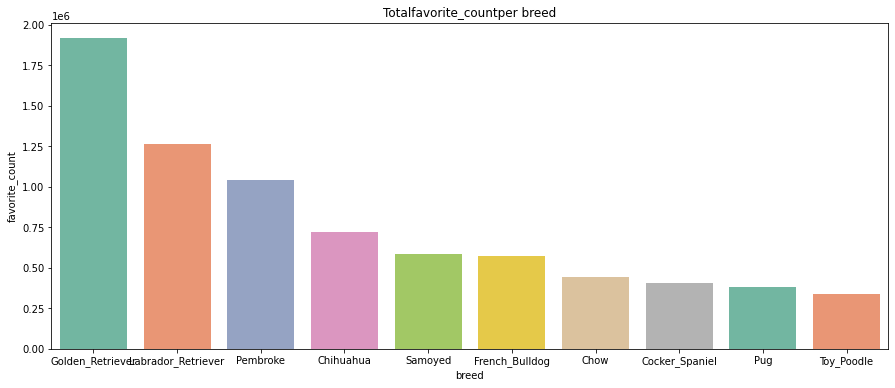

In [102]:
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x ='breed', y = i, data = df_bcopy.sort_values(i,ascending = False).iloc[:10],palette ='Set2')
ax.set_title('Total' + i + 'per breed')

Text(0.5, 1.0, 'Totalretweet_countper dogstage')

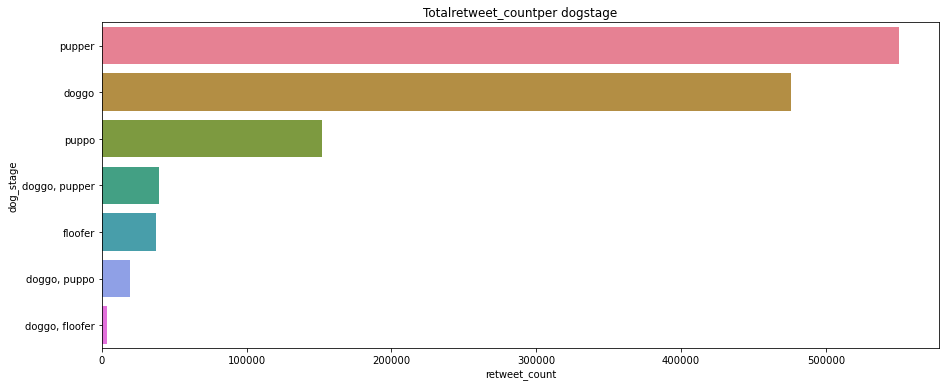

In [94]:
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x =i, y = 'dog_stage', data = df_dogstages.sort_values(i,ascending = False).iloc[:10],palette ='husl',orient='h')
ax.set_title('Total' + i + 'per dogstage')


<AxesSubplot:title={'center':'Average rating by breed'}, xlabel='breed'>

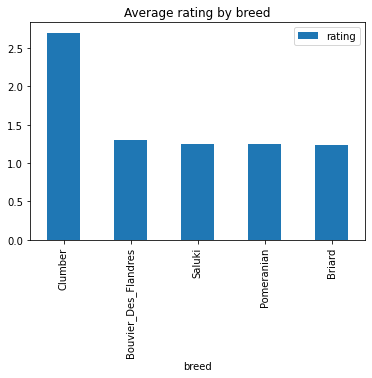

In [104]:
bar=breed_rating.sort_values(by='rating',ascending= False).head()
bar.plot(x="breed",y='rating',kind='bar',title="Average rating by breed")